**Fugu**
- Video streaming is the predominant Interet application, and a key question in video streaming is adaptive bitrate selection (ABR), which decides the compression level selected for each chunk/segment of the video. 
- Fugu: a data-driven ABR algorithm that is basead on model predictive control, but replaces its throughput predictor with a deep NN trained using supervised learning on data recorded in situ (in place), meaning from Fugu's actual deployment environment, Puffer.  
- Objective function: For each chunk, Fugu has a selection of versions of this chunk to choose from 
- Once Fugu decides which chunk to send, we know 2 portionso of the QoE: video quality and video quality variation. Fugu uses a trained NN transmission-time predictor (TTP) 
- For training the TTP, sample from real data collected by any scheme running on Puffer and feed individual user streams to the TTP as training input. Retrain the TTP every day. 

Puffer: https://puffer.stanford.edu 

Puffer is a Stanford University Research study about using ML to improve video-streaming applications, which are used by services such as Youtube, Netflix, ad Twitch. It aims to figure out how to teach a computer to design new algorithms to reduce glitches/stalls in streaming video, improve picture quality, and predict how the capacity of an internet connection will change over time. 

Data Description: https://puffer.stanford.edu/data-description/


In [ ]:
import pandas as pd 
# load in all the data from the data folder 
client_buffer = pd.read_csv('data/client_buffer_2024-06-13T11_2024-06-14T11.csv')
video_acked = pd.read_csv('data/video_acked_2024-06-13T11_2024-06-14T11.csv')
video_sent = pd.read_csv('data/video_sent_2024-06-13T11_2024-06-14T11.csv') 
video_size = pd.read_csv('data/video_size_2024-06-13T11_2024-06-14T11.csv')

Task 1: Convert SSIM (structural similarity index measure, which is a method for predicting the percieved video quality) to decibels (dB) using this formula: -10 * np.log10(1 - video_sent['ssim_index'])

In [3]:
import numpy as np

video_sent['ssim_index'] = -10 * np.log10(1 - video_sent['ssim_index'])
video_sent

/home/laasya/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,time (ns GMT),session_id,index,expt_id,channel,video_ts,format,size,ssim_index,cwnd,in_flight,min_rtt,rtt,delivery_rate,buffer,cum_rebuf
0,1718285996983000000,AJfuaxx3q8HL4/OlvckxRUHpnmP+W6gr0KDa93MOoWs=,6.0,2184.0,abc,7.547686e+10,1280x720-20,793917.0,17.389275,828.0,0.0,27133.0,57649.0,11400914.0,0.000,0.000
1,1718285997380000000,AJfuaxx3q8HL4/OlvckxRUHpnmP+W6gr0KDa93MOoWs=,6.0,2184.0,abc,7.547704e+10,1280x720-20,714715.0,17.745098,598.0,0.0,27133.0,100618.0,3896866.0,2.002,0.353
2,1718285997636000000,AJfuaxx3q8HL4/OlvckxRUHpnmP+W6gr0KDa93MOoWs=,6.0,2184.0,abc,7.547722e+10,1280x720-20,747294.0,17.545120,598.0,0.0,27133.0,155733.0,1949448.0,4.004,0.353
3,1718285997856000000,AJfuaxx3q8HL4/OlvckxRUHpnmP+W6gr0KDa93MOoWs=,6.0,2184.0,abc,7.547740e+10,1280x720-20,861549.0,17.828847,352.0,0.0,27133.0,123579.0,4070301.0,6.006,0.353
4,1718285998108000000,AJfuaxx3q8HL4/OlvckxRUHpnmP+W6gr0KDa93MOoWs=,6.0,2184.0,abc,7.547758e+10,1280x720-24,415828.0,17.832800,348.0,0.0,27133.0,60454.0,5146098.0,7.925,0.353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75620,1718291487799000000,pHSwE2hxFBu1FfQ5ufDkaMKq/oEi4maZzu0C794kDVc=,2.0,2184.0,nbc,7.597470e+10,1920x1080-22,1195900.0,17.977297,1168.0,0.0,9005.0,16662.0,3331051.0,14.962,0.094
75621,1718291489801000000,pHSwE2hxFBu1FfQ5ufDkaMKq/oEi4maZzu0C794kDVc=,2.0,2184.0,nbc,7.597488e+10,1920x1080-22,1036550.0,17.073453,1106.0,0.0,9005.0,18223.0,42705248.0,14.962,0.094
75622,1718291491790000000,pHSwE2hxFBu1FfQ5ufDkaMKq/oEi4maZzu0C794kDVc=,2.0,2184.0,nbc,7.597506e+10,1920x1080-22,405671.0,17.340036,1106.0,0.0,9005.0,16193.0,3196049.0,14.974,0.094
75623,1718291493799000000,pHSwE2hxFBu1FfQ5ufDkaMKq/oEi4maZzu0C794kDVc=,2.0,2184.0,nbc,7.597524e+10,1920x1080-22,1267633.0,16.056534,1136.0,0.0,9005.0,17073.0,24074953.0,14.968,0.094


Task 2: Group by session ID, then plot the CDF of average SSIM per session

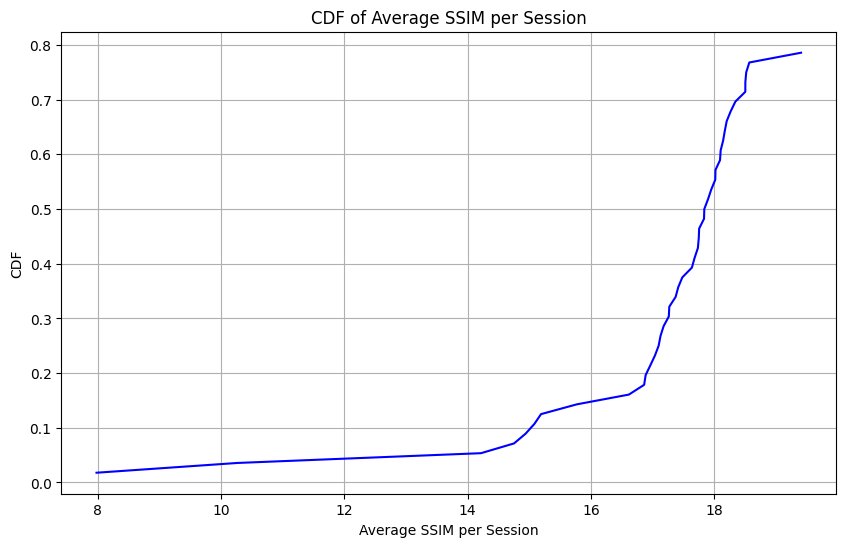

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Group by session_id and calculate the average SSIM per session
average_ssim_per_session = video_sent.groupby('session_id')['ssim_index'].mean()

# Sort the values
sorted_ssim = np.sort(average_ssim_per_session)

# Calculate the CDF
cdf = np.arange(1, len(sorted_ssim) + 1) / len(sorted_ssim)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_ssim, cdf, linestyle='-', color='b')  # Line plot, blue color
plt.xlabel('Average SSIM per Session')
plt.ylabel('CDF')
plt.title('CDF of Average SSIM per Session')
plt.grid(True)
plt.show()


Task 3: Plot the CDF of SSIM of the first chunk (first entry of every session)

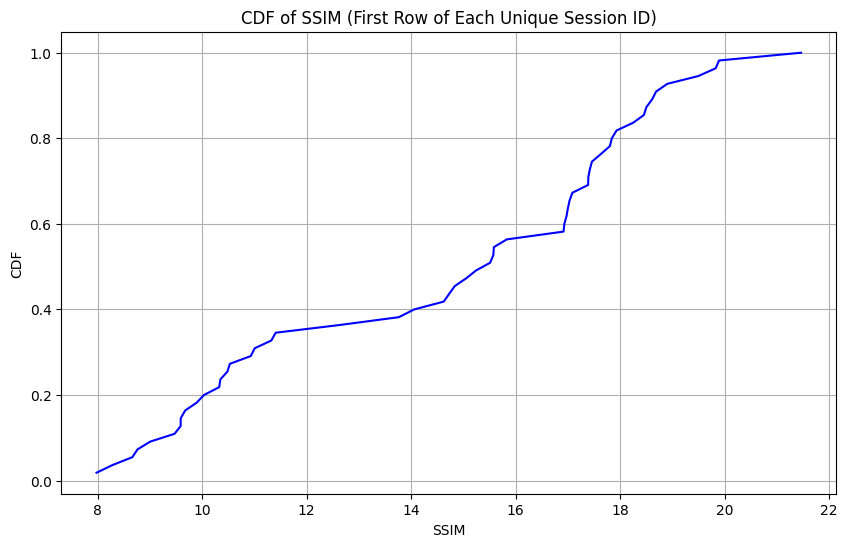

In [17]:
# Extract the first row of each unique session_id
first_rows = video_sent.drop_duplicates(subset='session_id', keep='first')

# Sort the SSIM values
sorted_ssim_first_rows = np.sort(first_rows['ssim_index'].dropna())

# Calculate the CDF
cdf_first_rows = np.arange(1, len(sorted_ssim_first_rows) + 1) / len(sorted_ssim_first_rows)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_ssim_first_rows, cdf_first_rows, linestyle='-', color='b')  # Line plot, blue color
plt.xlabel('SSIM')
plt.ylabel('CDF')
plt.title('CDF of SSIM (First Row of Each Unique Session ID)')
plt.grid(True)
plt.show()

Task 4: Plot the Standard deviation of SSIM vs the standard deviation of delivery-rate per session, as a scatter plot

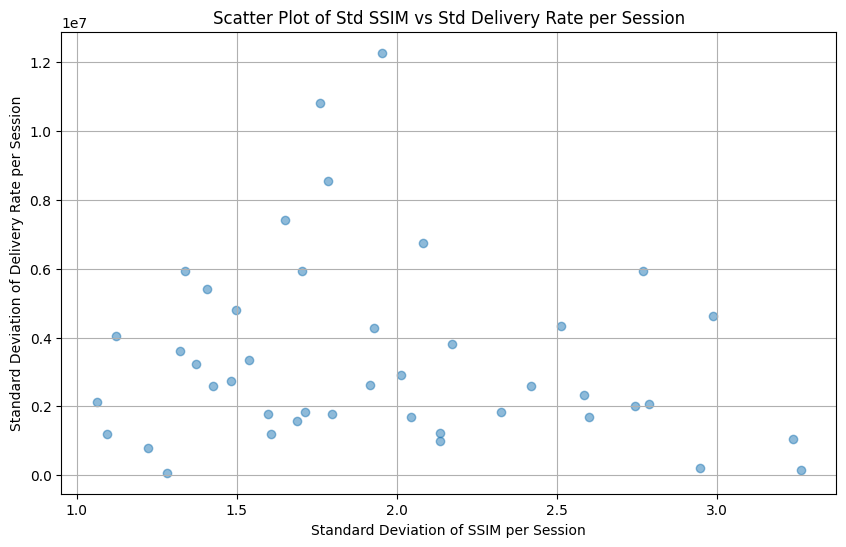

In [18]:
# Calculate the standard deviation of SSIM and delivery rate per session
std_ssim_per_session = video_sent.groupby('session_id')['ssim_index'].std()
std_delivery_rate_per_session = video_sent.groupby('session_id')['delivery_rate'].std()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(std_ssim_per_session, std_delivery_rate_per_session, alpha=0.5)
plt.xlabel('Standard Deviation of SSIM per Session')
plt.ylabel('Standard Deviation of Delivery Rate per Session')
plt.title('Scatter Plot of Std SSIM vs Std Delivery Rate per Session')
plt.grid(True)
plt.show()

Task 5: Plot the CDF of the average, max, and min delivery rate of each session in the same plot 

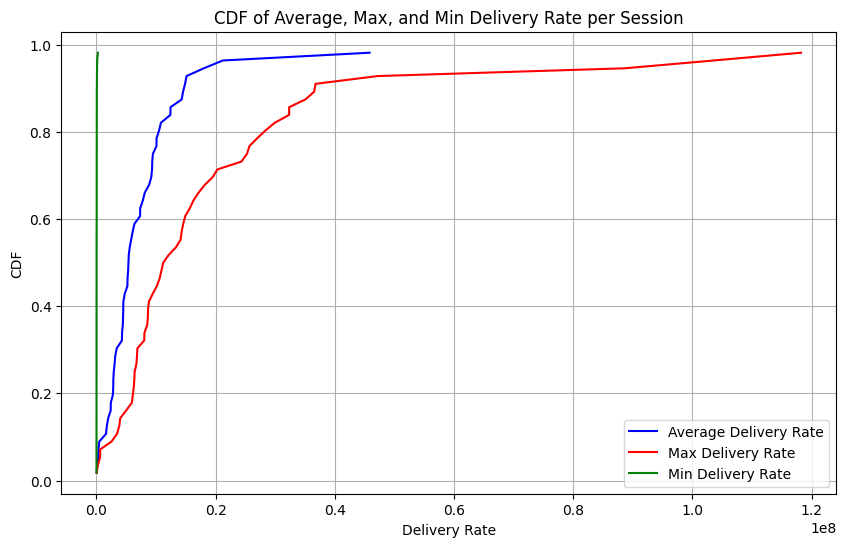

In [19]:
# Calculate average, max, and min delivery rate per session
average_delivery_rate_per_session = video_sent.groupby('session_id')['delivery_rate'].mean()
max_delivery_rate_per_session = video_sent.groupby('session_id')['delivery_rate'].max()
min_delivery_rate_per_session = video_sent.groupby('session_id')['delivery_rate'].min()

# Sort the values
sorted_avg_delivery_rate = np.sort(average_delivery_rate_per_session)
sorted_max_delivery_rate = np.sort(max_delivery_rate_per_session)
sorted_min_delivery_rate = np.sort(min_delivery_rate_per_session)

# Calculate the CDF
cdf_avg = np.arange(1, len(sorted_avg_delivery_rate) + 1) / len(sorted_avg_delivery_rate)
cdf_max = np.arange(1, len(sorted_max_delivery_rate) + 1) / len(sorted_max_delivery_rate)
cdf_min = np.arange(1, len(sorted_min_delivery_rate) + 1) / len(sorted_min_delivery_rate)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(sorted_avg_delivery_rate, cdf_avg, linestyle='-', color='b', label='Average Delivery Rate')
plt.plot(sorted_max_delivery_rate, cdf_max, linestyle='-', color='r', label='Max Delivery Rate')
plt.plot(sorted_min_delivery_rate, cdf_min, linestyle='-', color='g', label='Min Delivery Rate')
plt.xlabel('Delivery Rate')
plt.ylabel('CDF')
plt.title('CDF of Average, Max, and Min Delivery Rate per Session')
plt.legend()
plt.grid(True)
plt.show()

Task 6: Show the number of rebuffing per session (Hint: look at the Puffer data description)

In [27]:
# client_buffer['event'].value_counts()
# Count the number of times 'rebuffer' appears in the 'event' column
rebuffer_counts = client_buffer[client_buffer['event'] == 'rebuffer'].groupby('session_id').size()

# Print the counts
rebuffer_counts

session_id
+/cEqz3YAXcB5Crng+Yo0pAhxz8hICYCx0/wTrGS4Jg=     1
+5lRX6Ga1OifPyyroneekW3bFodFLZOSL6yPKe4HxwA=     1
+7RKIFlAZPK5wjFC967UcS83171m90205OFsRudtjM0=     1
+NS3JIoup61KnTNcIGRSaG+k25jexJ2SK8U6jGxwPfk=    10
+cU0YkfNmGNDZm4wuDE88p2mSRxZj2vO+TOoE90lWAM=     2
                                                ..
zVy2F4EArfngB7vMQNXFRiOlrP4iTZ8W/Sr68ksaaaw=     3
zg1GZvDOapX2oRA6MxwWMn4YNzPwPM9FrcAstkMIqq8=     3
zm7KSfHffhTOg+6HP1tmnbS5rGucv5t8ZrgGqNuT5Q0=    10
zsM7qp71M/ScXrPJ0ZYhvXaO9pVYCwha7Ha6Ur49omE=     8
zzSC8n2Sdw3r5MYKOjalK4k0EdNbbPrIA9FefVP8eRM=     1
Length: 345, dtype: int64

Task 7: Plot the average delivery rate vs average SSIM, as a scatter plot. 

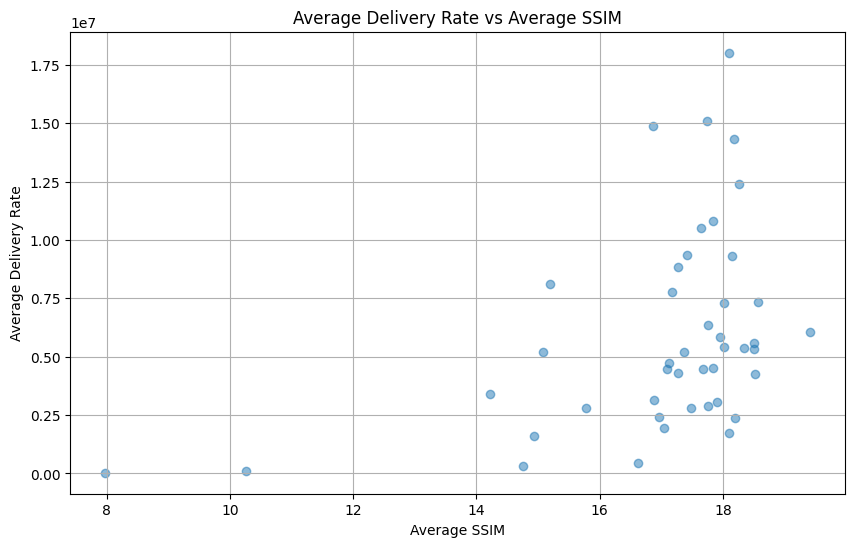

In [28]:
# Calculate the average delivery rate and average SSIM per session
average_delivery_rate = video_sent.groupby('session_id')['delivery_rate'].mean()
average_ssim = video_sent.groupby('session_id')['ssim_index'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(average_ssim, average_delivery_rate, alpha=0.5)
plt.xlabel('Average SSIM')
plt.ylabel('Average Delivery Rate')
plt.title('Average Delivery Rate vs Average SSIM')
plt.grid(True)
plt.show()